# 08_Analysis of Train and Test Datasets - String Types
- In this notebook I analyze and summarize the application_trainand application_test datasets' string or objecttypes. The datasets have three types: float64, int64, and object.The int64 and float64 types are analyzed in a different notebook.

- To more efficiently analyze both datasets I combined them into one dataframe and added a filter to later separate them.The application_trainand application_test datasets includes all the same fields except the target variable.

- The main objective in this notebook is to gain an understanding of the datasets using descriptive statistics and data visualizations. After reviewing these statistics and data visualizations I will decide which fields should be included as features. I also perform transformations on fields as deemed necessary.

**Analysis Summary**:
- After analyzing the string type fields I decided to remove the fields that had a null or missing rate higher than 10%. For the one field that had a null rate less than 10% I fill in the missing values with the most frequent value. My analysis began with 16 string type fields and at the end I was left with 11. These 11 fields will be treated as categorical features.

In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## 8.1 Import data and overview data

In [2]:
df = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\application_train.csv")
test_df = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\application_test.csv")
FieldsNames = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\HomeCredit_columns_description.csv")

In [3]:
# combine 2 tables df and test_df
df = df.append(test_df)

In [4]:
df.shape

(356255, 122)

In [5]:
df.dtypes.value_counts()

float64    66
int64      40
object     16
dtype: int64

In [6]:
cat_col = df.select_dtypes(['object']).columns 

In [7]:
other_table = df[cat_col]

In [8]:
other_table.describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,356255,2,Cash loans,326537
CODE_GENDER,356255,3,F,235126
FLAG_OWN_CAR,356255,2,N,235235
FLAG_OWN_REALTY,356255,2,Y,246970
NAME_TYPE_SUITE,354052,7,Unaccompanied,288253
NAME_INCOME_TYPE,356255,8,Working,183307
NAME_EDUCATION_TYPE,356255,5,Secondary / secondary special,252379
NAME_FAMILY_STATUS,356255,6,Married,228715
NAME_HOUSING_TYPE,356255,6,House / apartment,316513
OCCUPATION_TYPE,244259,18,Laborers,63841


In [9]:
# print description of each field in the table
Info = FieldsNames[FieldsNames['Table'] == 'application_{train|test}.csv'][['Row','Description']]

for i in cat_col:
    for j in Info.values.tolist():
       if i == j[0]:
           print(i,":",j[1],"\n","-"*100)

NAME_CONTRACT_TYPE : Identification if loan is cash or revolving 
 ----------------------------------------------------------------------------------------------------
CODE_GENDER : Gender of the client 
 ----------------------------------------------------------------------------------------------------
FLAG_OWN_CAR : Flag if the client owns a car 
 ----------------------------------------------------------------------------------------------------
FLAG_OWN_REALTY : Flag if client owns a house or flat 
 ----------------------------------------------------------------------------------------------------
NAME_TYPE_SUITE : Who was accompanying client when he was applying for the loan 
 ----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE : Clients income type (businessman, working, maternity leave,�) 
 ----------------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE : 

## 8.2 Analyze Missing Values
Observations:
- The housing fields: FONDKAPREMONT_MODE, HOUSETYPE_MODE,ALLSMATERIAL_MODEand MERGENCYSTATE_MODE, have high correlation.

Conclusion:
- Remove any fields that have missing values percentage higher than 10%.
- Fill the fields with a missing percentange less than 10% with mode value.

In [10]:
# get fields that have missing data over 10% 
drop_columns = []
for i in range(len(other_table.isnull().mean())):
    if other_table.isnull().mean()[i] > 0.1:
        drop_columns.append(other_table.isnull().mean().index.values.tolist()[i])

#drop columns with over 10% missing data
other_table_filter = other_table.drop(columns=drop_columns, axis=1)

In [11]:
other_table_filter.describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,356255,2,Cash loans,326537
CODE_GENDER,356255,3,F,235126
FLAG_OWN_CAR,356255,2,N,235235
FLAG_OWN_REALTY,356255,2,Y,246970
NAME_TYPE_SUITE,354052,7,Unaccompanied,288253
NAME_INCOME_TYPE,356255,8,Working,183307
NAME_EDUCATION_TYPE,356255,5,Secondary / secondary special,252379
NAME_FAMILY_STATUS,356255,6,Married,228715
NAME_HOUSING_TYPE,356255,6,House / apartment,316513
WEEKDAY_APPR_PROCESS_START,356255,7,TUESDAY,63652


In [12]:
#create new dataset with high missing fields removed
features =  ['SK_ID_CURR','TARGET'] + other_table_filter.columns.values.tolist()
new_dataset = df[features].copy()

In [13]:
#fill na for 
#lets fill the missing values in the 'NAME_TYPE_SUITE' with the most frequent value
freq = other_table_filter['NAME_TYPE_SUITE'].value_counts(normalize = True).index[0]
new_dataset['NAME_TYPE_SUITE'].fillna(freq,inplace=True)
new_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,100002,1.0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3
1,100003,0.0,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,MONDAY,School
2,100004,0.0,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY,Government
3,100006,0.0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,WEDNESDAY,Business Entity Type 3
4,100007,0.0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,THURSDAY,Religion


In [14]:
new_dataset.iloc[:,2:].describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,356255,2,Cash loans,326537
CODE_GENDER,356255,3,F,235126
FLAG_OWN_CAR,356255,2,N,235235
FLAG_OWN_REALTY,356255,2,Y,246970
NAME_TYPE_SUITE,356255,7,Unaccompanied,290456
NAME_INCOME_TYPE,356255,8,Working,183307
NAME_EDUCATION_TYPE,356255,5,Secondary / secondary special,252379
NAME_FAMILY_STATUS,356255,6,Married,228715
NAME_HOUSING_TYPE,356255,6,House / apartment,316513
WEEKDAY_APPR_PROCESS_START,356255,7,TUESDAY,63652


## 8.3 Plot Bar Graph
- Plot the count of each value as a bar graph.
- Due to its category size the ORGANIZATION_TYPE field is plotted seperately.

Observations:
- Most of the loans types are cash loans.
- Females make up the majority of applicants.
- The majority of applicants are married.
- Most of the applicants owned real estate property.

---------------------------------------------------------------------------------------------------- 
 NAME_CONTRACT_TYPE


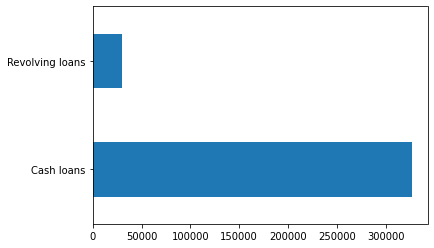

---------------------------------------------------------------------------------------------------- 
 CODE_GENDER


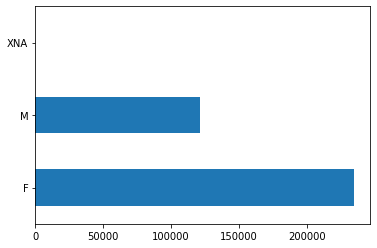

---------------------------------------------------------------------------------------------------- 
 FLAG_OWN_CAR


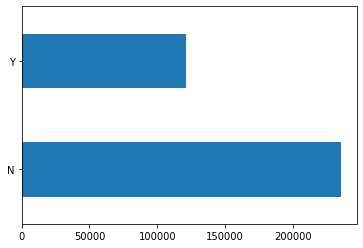

---------------------------------------------------------------------------------------------------- 
 FLAG_OWN_REALTY


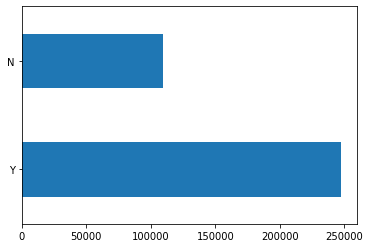

---------------------------------------------------------------------------------------------------- 
 NAME_TYPE_SUITE


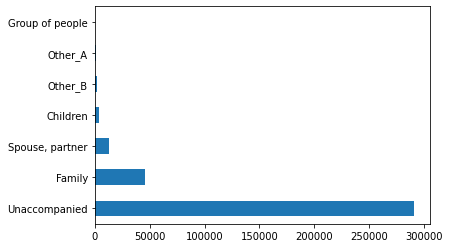

---------------------------------------------------------------------------------------------------- 
 NAME_INCOME_TYPE


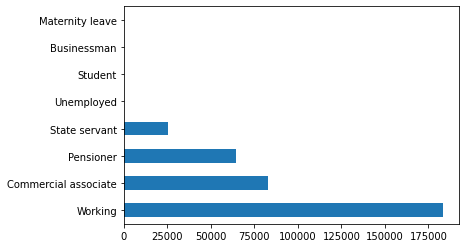

---------------------------------------------------------------------------------------------------- 
 NAME_EDUCATION_TYPE


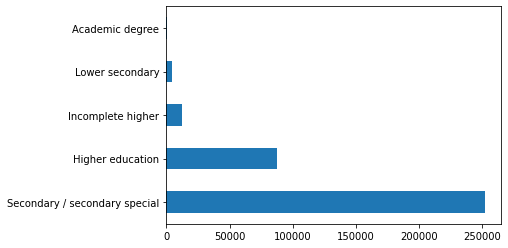

---------------------------------------------------------------------------------------------------- 
 NAME_FAMILY_STATUS


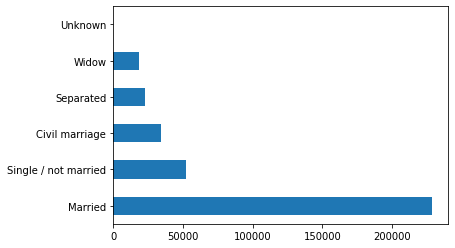

---------------------------------------------------------------------------------------------------- 
 NAME_HOUSING_TYPE


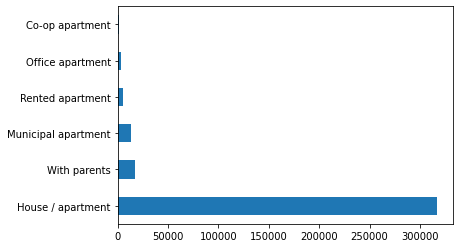

---------------------------------------------------------------------------------------------------- 
 WEEKDAY_APPR_PROCESS_START


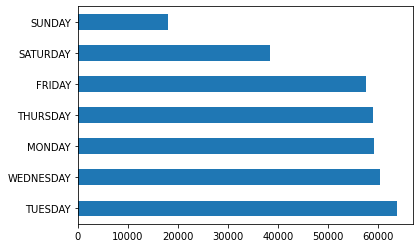

In [16]:
# lets plot the fields but excluded 'ORGANIZATION_TYPE'  since it has a lot of different values
# 'ORGANIZATION_TYPE' will be plotted seperately
plot_fields = [f for f in other_table_filter.columns.values.tolist() if f not in 'ORGANIZATION_TYPE']
for plot_field in plot_fields:
    print("-"*100, "\n", plot_field)
    new_dataset[plot_field].value_counts().plot.barh()
    plt.show()

<ipython-input-17-37bcd34a6f79>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0f}'.format(x) for x in ax.get_xticks()])


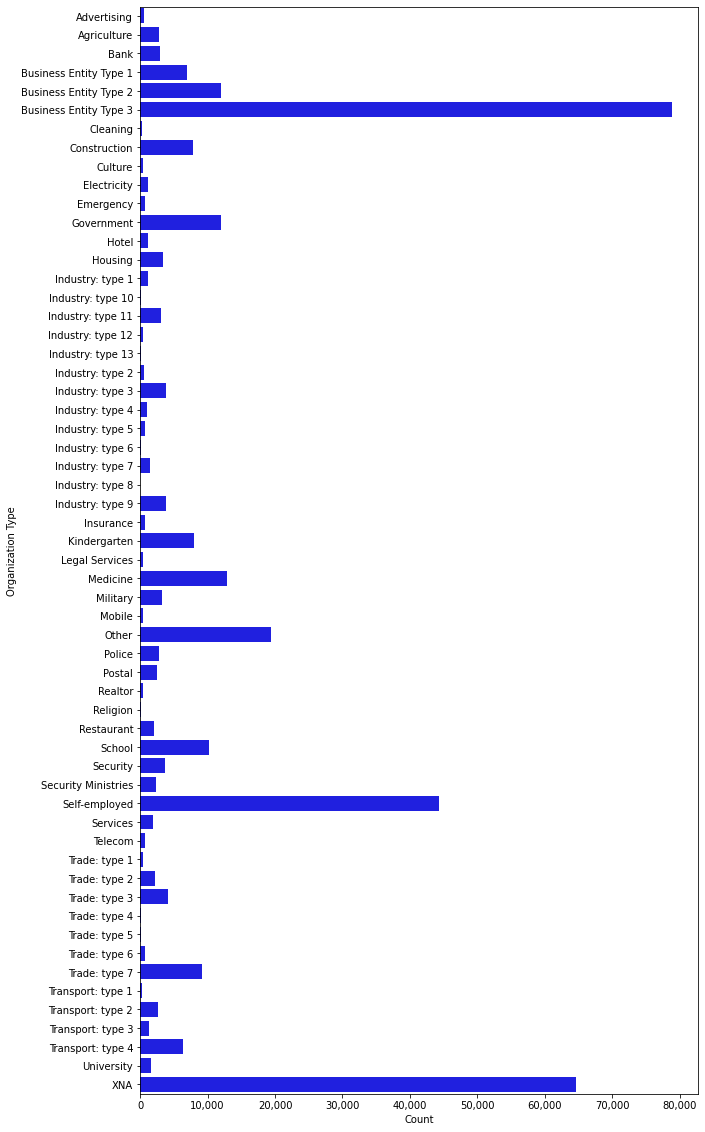

In [17]:
#plot 'ORGANIZATION_TYPE' 
f, ax = plt.subplots(figsize=(10, 20))

cnt = new_dataset.groupby('ORGANIZATION_TYPE').size()
sns.barplot(y=cnt.index,x=cnt.values, color="b", ax=ax)
ax.set_xticklabels(['{:,.0f}'.format(x) for x in ax.get_xticks()])

ax.set_xlabel('Count')
ax.set_ylabel('Organization Type')

plt.show()

## 8.4 Save Fields To File

In [19]:
new_dataset[features].to_csv(r'C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\results\1_8_applications_string_types.csv',index=False)
print("The file was saved.")

The file was saved.
